In [1]:
%pylab inline
from CO2_sim_1D import CO2_1D

Populating the interactive namespace from numpy and matplotlib


In [2]:
n=20
x = linspace(0,5000,n)
z = linspace(0,1,n)
np.random.seed(7)
r = ones(n-1) + 0.1*np.random.rand(n-1)
#r[5] = 0.5
sim = CO2_1D(x,z, init_radii=r, 
             Q_w=.2, 
             T_outside=20., 
             D_a=35., D_w=35.,
             adv_disp_stabil_factor=0.5)

In [3]:

#sim.h[0]=1.
sim.calc_flow_depths()
#sim.T_outside = 0
sim.calc_air_flow()
#sim.calc_steady_adv_disp_reaction()
sim.calc_steady_state_transport()

0.7120159334304614
0.7747271853393728
0.6990057721043756
0.6906938917766601
0.6821817307171225
0.6950119823867313
0.6970265082153484
0.7114144189659017
0.706269437114701
0.6968621748849961
0.6921801572275003
0.6863912419103027
0.7014969036601354
0.7105508755430494
0.7056543464997361
0.6849363037385596
0.705277213739869
0.6974082778016992
0.683895117706597
Air discharge =  -0.5627065717918689  m^3/s
[4.47582945e-05 4.42608105e-05 4.41976198e-05 4.41292850e-05
 4.40556835e-05 4.39766921e-05 4.38921871e-05 4.38020443e-05
 4.37061398e-05 4.36043494e-05 4.34965491e-05 4.33826157e-05
 4.32624265e-05 4.31358597e-05 4.30027949e-05 4.28631131e-05
 4.27166970e-05 4.25634318e-05 4.24032048e-05 4.22359064e-05
 4.20614301e-05 4.18796730e-05 4.16905364e-05 4.14939261e-05
 4.12897527e-05 4.10779325e-05 4.08583879e-05 4.06310476e-05
 4.03958477e-05 4.01527320e-05 3.99016526e-05 3.96425710e-05
 3.93754580e-05 3.91002954e-05 3.88170758e-05 3.85258041e-05
 3.82264982e-05 3.79191892e-05 3.76039233e-05 3.7

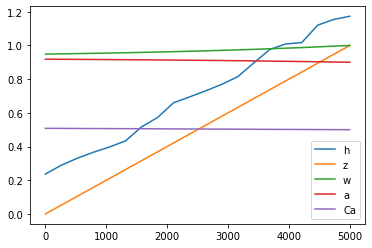

In [4]:
xmid = (x[1:] + x[:-1])/2.
plot(x, sim.h)
plot(x,z)
#plot(xmid,sim.fd_mids)
plot(x,sim.CO2_w)
plot(x,sim.CO2_a)
plot(x,sim.Ca)
legend(['h','z','w','a','Ca'])


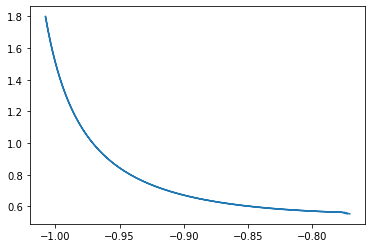

In [9]:
#sim.CO2_a
#plot(xmid,sim.CO2_w[1:] - sim.CO2_w[:-1])
#plot(xmid,sim.CO2_a[1:] - sim.CO2_a[:-1])
#sim.CO2_a/sim.pCO2_outside
plot(sim.xcs[0].y[sim.xcs[0].wetidx] ,sim.xcs[0].T_b)

In [11]:
sim.fd_mids

array([0.23675635, 0.23119206, 0.20851245, 0.18673571, 0.17030692,
       0.20068537, 0.20386752, 0.23870604, 0.22086716, 0.20384349,
       0.18977018, 0.18243177, 0.21129622, 0.23856113, 0.21929635,
       0.17478742, 0.22569495, 0.20682535, 0.17327747])

Timestep= 1
rel tol CO2_w= 0.01585250298137142   abs_tol_CO2_w= 0.01585250298137142
rel tol CO2_a= 0.04858932176275174   abs_tol_CO2_a= 0.04373038958647657
Timestep= 2
rel tol CO2_w= 0.007287839915044959   abs_tol_CO2_w= 0.007231100834339199
rel tol CO2_a= 0.029821787559815207   abs_tol_CO2_a= 0.027589589179892737
Timestep= 3
rel tol CO2_w= 0.005657631439024222   abs_tol_CO2_w= 0.005611223788212549
rel tol CO2_a= 0.02110850288133329   abs_tol_CO2_a= 0.019006802773266274
Timestep= 4
rel tol CO2_w= 0.004345721940384544   abs_tol_CO2_w= 0.004294436831318693
rel tol CO2_a= 0.015483595868183054   abs_tol_CO2_a= 0.014617727597188157
Timestep= 5
rel tol CO2_w= 0.00433336354776451   abs_tol_CO2_w= 0.004227648740219525
rel tol CO2_a= 0.013918055072541922   abs_tol_CO2_a= 0.012968854661179696
Timestep= 6
rel tol CO2_w= 0.00429868896257276   abs_tol_CO2_w= 0.00420304409264971
rel tol CO2_a= 0.013166454705941976   abs_tol_CO2_a= 0.012017896822029805
Timestep= 7
rel tol CO2_w= 0.004431584621077894 

rel tol CO2_w= 2.9210384626113105e-06   abs_tol_CO2_w= 2.7596071131563704e-06
rel tol CO2_a= 4.6216243676439763e-07   abs_tol_CO2_a= 3.9603114243558224e-07
rel tol Ca= 0.00015535133021400726   abs_tol_Ca= 8.099605895484085e-05
Timestep= 57
rel tol CO2_w= 1.4203733301865887e-06   abs_tol_CO2_w= 1.3418724011948768e-06
rel tol CO2_a= 2.1402587206439293e-07   abs_tol_CO2_a= 1.8340060703447847e-07
rel tol Ca= 9.729787458155177e-05   abs_tol_Ca= 5.0736409267004845e-05
Timestep= 58
rel tol CO2_w= 6.504176177881344e-07   abs_tol_CO2_w= 6.144695851029169e-07
rel tol CO2_a= 9.408855451374732e-08   abs_tol_CO2_a= 8.062527279140141e-08
rel tol Ca= 5.874956859306042e-05   abs_tol_Ca= 3.063820447357646e-05
Timestep= 59
rel tol CO2_w= 2.7771776688624366e-07   abs_tol_CO2_w= 2.623683696967305e-07
rel tol CO2_a= 3.8892757647430277e-08   abs_tol_CO2_a= 3.3327527626525466e-08
rel tol Ca= 3.4251364357992644e-05   abs_tol_Ca= 1.7863313410582116e-05
Timestep= 60
rel tol CO2_w= 1.0850011084966219e-07   abs_t

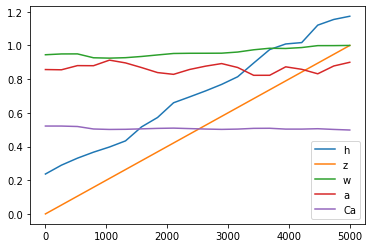

In [6]:
sim.calc_steady_adv_disp_reaction()
plot(x, sim.h)
plot(x,z)
#plot(xmid,sim.fd_mids)
plot(x,sim.CO2_w)
plot(x,sim.CO2_a)
plot(x,sim.Ca)
legend(['h','z','w','a','Ca'])

In [7]:
sim.flow_type

array(['norm', 'pbflood', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm', 'norm',
       'norm', 'norm', 'norm'], dtype=object)

In [8]:
################### Next
#####################
#Steps for xc erosion
#1. set Umax position
#2. set energy slope
#3. calc Umax
#4. calc VGrad
#5. calc phi (two diff defs?)
#6. calc T_b
#7. adjust T_b onto bed normal vector using angles alpha and phi (maybe can do this from beginning with Vgrad)
#8. calculate erosion rates
#9. avg ersion rate for transport
#10. redraw xc

this_xc = sim.xcs[0]
this_fd = sim.fd_mids[0]




In [9]:
diff_bnd=0
sim.Lambda_w*(sim.CO2_a[1:] - sim.CO2_w[1:])

array([-0.08333548, -0.05809078, -0.04084243, -0.01004041, -0.02593455,
       -0.05668358, -0.09033806, -0.10976711, -0.08422624, -0.06607041,
       -0.05263771, -0.07757141, -0.13177244, -0.14227227, -0.09526029,
       -0.10856233, -0.14696902, -0.10472206, -0.08389988])

In [10]:
diff_bnd=0
diff_bnd2=1

V_w = sim.V_w
V_w_mean = sim.V_w_mean
dx = sim.dx_ad
dt = sim.dt_ad
CO2_w = sim.CO2_w
CO2_a = sim.CO2_a
print((1./dt -(np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2.*dx))*CO2_w[diff_bnd])

print(((np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2*dx))*CO2_w[diff_bnd2])

7.901738661961842
8.88357987240744


In [11]:
sim.

SyntaxError: invalid syntax (<ipython-input-11-5ecfe182600d>, line 1)

In [ ]:
np.sign(V_w[0])*(V_w[diff_bnd]/V_w_mean)

In [ ]:
V_w_mean